<a href="https://colab.research.google.com/github/AbdheshRathore/Exploratory-Data-Analysis/blob/main/EDA_Weather_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Weather Trend Analysis and Data Preparation for Forecasting Models


In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Upload file in google colabe

In [91]:
from google.colab import files
uploaded=files.upload()

Saving data_clean.csv to data_clean (1).csv


In [92]:
# Data Reading
df=pd.read_csv('data_clean.csv')
df=df.iloc[:,1:]
df

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,67,5,1,2010,67,S
1,36.0,118.0,8.0,72,5,2,2010,72,C
2,12.0,149.0,12.6,74,5,3,2010,74,PS
3,18.0,313.0,11.5,62,5,4,2010,62,S
4,NaN,NaN,14.3,56,5,5,2010,56,S
...,...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,67,5,1,2010,67,C
154,30.0,193.0,6.9,70,9,26,2010,70,PS
155,NaN,145.0,13.2,77,9,27,2010,77,S
156,14.0,191.0,14.3,75,9,28,2010,75,S


# Describe a Dataset: Number of rows / columns, missing data, data types, preview.

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Temp C   158 non-null    object 
 4   Month    158 non-null    object 
 5   Day      158 non-null    int64  
 6   Year     158 non-null    int64  
 7   Temp     158 non-null    int64  
 8   Weather  155 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 11.2+ KB


In [94]:
df.isna().sum()

,0
Ozone,38
Solar.R,7
Wind,0
Temp C,0
Month,0
Day,0
Year,0
Temp,0
Weather,3


In [95]:
# here the code of info telling the total information about the data
# Row-158
# Column-9
# 3 column of float type, 3 column object type and 3 of int64 type
#  2 column with same name Temp
# its also showing about data missing like in Ozone column 120 entryout of 158 and in solar and wether but count not clear
# Now check for data type preview present in column
df.head()


,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,67,5,1,2010,67,S
1,36.0,118.0,8.0,72,5,2,2010,72,C
2,12.0,149.0,12.6,74,5,3,2010,74,PS
3,18.0,313.0,11.5,62,5,4,2010,62,S
4,NaN,NaN,14.3,56,5,5,2010,56,S


As we can see, the value present in column tempc and month is numeric but the data type is object. so first convert the correct data type

In [96]:
df['Temp C'].unique()

array(['67', '72', '74', '62', '56', '66', '65', '59', '61', '69', 'C',
       '68', '58', '64', '57', '73', '81', '79', '76', '78', '84', '85',
       '82', '87', '90', '93', '92', '80', '77', '75', '83', '88', '89',
       '91', '86', '97', '94', '96', '71', '63', '70'], dtype=object)

In [97]:
df['Month'].unique()

array(['5', 'May', '6', '7', '8', '9'], dtype=object)

In [98]:
df['Month']=df['Month'].replace('May',5.0)
df['Month'].unique()

array(['5', 5.0, '6', '7', '8', '9'], dtype=object)

In [99]:
df['Weather'].unique()

array(['S', 'C', 'PS', nan], dtype=object)

At here we can see all the unique value (int) present in the column, there is one categorical data present 'C' in Temp C and one 'May' in Month column, so we can not make it numeric in temp c but in month we can put 5th month as May, now we need to convert this data type to numeric and if any one of value which not able to convert then delete those value

# Data Conversion

In [100]:
df['Temp C']=pd.to_numeric(df['Temp C'],errors='coerce')
df['Month']=pd.to_numeric(df['Month'],errors='coerce')
df['Weather']=df['Weather'].astype('category')

In [101]:
df['Temp C'].unique()

array([67., 72., 74., 62., 56., 66., 65., 59., 61., 69., nan, 68., 58.,
       64., 57., 73., 81., 79., 76., 78., 84., 85., 82., 87., 90., 93.,
       92., 80., 77., 75., 83., 88., 89., 91., 86., 97., 94., 96., 71.,
       63., 70.])

In [102]:
df['Month'].unique()

array([5., 6., 7., 8., 9.])

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Ozone    120 non-null    float64 
 1   Solar.R  151 non-null    float64 
 2   Wind     158 non-null    float64 
 3   Temp C   157 non-null    float64 
 4   Month    158 non-null    float64 
 5   Day      158 non-null    int64   
 6   Year     158 non-null    int64   
 7   Temp     158 non-null    int64   
 8   Weather  155 non-null    category
dtypes: category(1), float64(5), int64(3)
memory usage: 10.3 KB


# Check Duplicate Value

In [104]:
# it will show result in true and false for all row
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
153,False
154,False
155,False
156,True


In [105]:
# it will show result for only row which is duplicated,so there is only one row which is duplicated
df.duplicated().any()

np.True_

In [106]:
# print the row which is duplicated
df[df.duplicated()]

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
156,14.0,191.0,14.3,75.0,9.0,28,2010,75,S


In [107]:
# print all duplicated row
df[df.duplicated(keep=False)]

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
150,14.0,191.0,14.3,75.0,9.0,28,2010,75,S
156,14.0,191.0,14.3,75.0,9.0,28,2010,75,S


In [108]:
df[df.duplicated()].shape

(1, 9)

# Drop Duplicates

In [109]:
df.drop_duplicates(inplace=True)

In [110]:
df.shape

(157, 9)

Now in our Data there are two column with same name, first we need to compair both column if the value present in both column are same then we need to drop one of them.

In [111]:
df[['Temp C','Temp']]

,Temp C,Temp
0,67.0,67
1,72.0,72
2,74.0,74
3,62.0,62
4,56.0,56
...,...,...
152,68.0,68
153,67.0,67
154,70.0,70
155,77.0,77


In [112]:
# in above data top 5 and bottom 5 entry are same lets explore more
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 157 entries, 0 to 157
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Ozone    119 non-null    float64 
 1   Solar.R  150 non-null    float64 
 2   Wind     157 non-null    float64 
 3   Temp C   156 non-null    float64 
 4   Month    157 non-null    float64 
 5   Day      157 non-null    int64   
 6   Year     157 non-null    int64   
 7   Temp     157 non-null    int64   
 8   Weather  154 non-null    category
dtypes: category(1), float64(5), int64(3)
memory usage: 11.3 KB


In [113]:
# Compaire both column
df[df['Temp C']!=df['Temp']]

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
10,7.0,NaN,6.9,NaN,5.0,11,2010,74,C


In [114]:
# there is only one row which dont have any data showing not match othe all value are matched that means both column are same
# drop coulmn
df=df.drop('Temp C',axis=1)

In [115]:
df

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9.0,30,2010,68,S
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,NaN,145.0,13.2,9.0,27,2010,77,S


In [116]:
df.shape

(157, 8)

In [117]:
# Now in our data there is coulmn year look same value entry for all row lets check
df['Year'].unique()

array([2010])

In [118]:
# So there is same year for all row,  we can delete it also becoze all report for 2010 only.
df=df.drop('Year',axis=1)

In [119]:
df.shape

(157, 7)

In [120]:
df

,Ozone,Solar.R,Wind,Month,Day,Temp,Weather
0,41.0,190.0,7.4,5.0,1,67,S
1,36.0,118.0,8.0,5.0,2,72,C
2,12.0,149.0,12.6,5.0,3,74,PS
3,18.0,313.0,11.5,5.0,4,62,S
4,NaN,NaN,14.3,5.0,5,56,S
...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9.0,30,68,S
153,41.0,190.0,7.4,5.0,1,67,C
154,30.0,193.0,6.9,9.0,26,70,PS
155,NaN,145.0,13.2,9.0,27,77,S


# Rename the column name

In [121]:
df=df.rename({'Solar.R':'Solar','Temp':'Temp_F'},axis=1)
df

,Ozone,Solar,Wind,Month,Day,Temp_F,Weather
0,41.0,190.0,7.4,5.0,1,67,S
1,36.0,118.0,8.0,5.0,2,72,C
2,12.0,149.0,12.6,5.0,3,74,PS
3,18.0,313.0,11.5,5.0,4,62,S
4,NaN,NaN,14.3,5.0,5,56,S
...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9.0,30,68,S
153,41.0,190.0,7.4,5.0,1,67,C
154,30.0,193.0,6.9,9.0,26,70,PS
155,NaN,145.0,13.2,9.0,27,77,S


##Clean Data: Handle Missing values, Invalid data types, incorrect values and outlies

### Missing Values and Imputation

In [122]:
# Check missing value
df.isnull().sum()

,0
Ozone,38
Solar,7
Wind,0
Month,0
Day,0
Temp_F,0
Weather,3


If the dataset is small, and only 3-5% data is missing from a specific numerical column, then it will be ideal to replace the missing values with either mean or median
- Mean: If the data is normally distributed
- Median: If the data is skewed

If more than 60-70% is missing, then it will be ideal to drop the column, because imputing so much data is neither possible, nor appropriate.

If data is missing upto 5% to 40%, then used advanced techniques.
Either use linear regression, decision trees, or discretization

In [123]:
df.columns

Index(['Ozone', 'Solar', 'Wind', 'Month', 'Day', 'Temp_F', 'Weather'], dtype='object')

In [124]:
# percent of avaialable in a ozone column
(df['Ozone'].count()/157)*100

np.float64(75.79617834394905)

In [125]:
#  percentage of data missing in Ozone column
(1-df['Ozone'].count()/157)*100

np.float64(24.20382165605095)

In our data set coulmn Ozone there are 24 % data missing so we can Impute the missing value by using advance technic, but here we will use mean and median only.

Now we need to choose the technique for missing data imputation, we need to first check the data distribution then after we can decide it will mean or median

In [126]:
#  percentage of data missing in Solar column
(1-df['Solar'].count()/157)*100

np.float64(4.458598726114649)

In [127]:
#  percentage of data missing in Solar column
(1-df['Weather'].count()/157)*100

np.float64(1.9108280254777066)

In [128]:
print('The % of missing values in Ozone is', (38/157)*100)
print('The % of missing values in Solar is', (7/157)*100)
print('The % of missing values in Weather is', (3/157)*100)

The % of missing values in Ozone is 24.203821656050955
The % of missing values in Solar is 4.45859872611465
The % of missing values in Weather is 1.910828025477707


- Since only about 4.43% data is missing in 'Solar', we can replace the missing value with mean/median depending upon skewness in the data.
- If data is skewed, then replace with median
- If data is normally dstributed, then replace with mean

-1 -------- -0.5 -------- 0 -------- 0.5 -------- 1

If skewness value is closer to -0.4 or less, OR 0.4 or more, then replace missing values with Median.
If skewness value is more closer to 0, then replace missing values with Mean.

Also if more than 5% data is missing, then it is NOT ideal to replace with a single value,
we should look for similar cases in the data to impute the missing values.

Suppose we consider 'Solar' column to be helpful in determining the missing values in Ozone, we must bin the Ozone data, and find the mean value of solar grouped by these bins.

But 'Solar' column also has some missing data, so we need to impute those first if we want to use the 'Solar' column to impute missing values in 'Ozone' column.

In [129]:
df['Solar'].skew()

np.float64(-0.4141167126969295)

In [130]:
df['Solar'].median()

199.0

In [131]:
df['Solar'].fillna(df['Solar'].median(),inplace=True)

/tmp/ipython-input-2217082878.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Solar'].fillna(df['Solar'].median(),inplace=True)


In [132]:
df['Solar'].isnull().sum()

np.int64(0)

In [133]:
# To check which row have missingvalue under any column
df[df.isnull().any(axis=1)]

,Ozone,Solar,Wind,Month,Day,Temp_F,Weather
4,NaN,199.0,14.3,5.0,5,56,S
9,NaN,194.0,8.6,5.0,10,69,S
24,NaN,66.0,16.6,5.0,25,57,PS
25,NaN,266.0,14.9,5.0,26,58,C
26,NaN,199.0,8.0,5.0,27,57,PS
31,NaN,286.0,8.6,6.0,1,78,S
32,NaN,287.0,9.7,6.0,2,74,C
33,NaN,242.0,16.1,6.0,3,67,PS
34,NaN,186.0,9.2,6.0,4,84,C
35,NaN,220.0,8.6,6.0,5,85,PS


Now fill the ozone Column with advance technique, we take help of other column data to fill Ozone column missing value, We choose the column Temp_F

In [134]:
df['Temp_F'].describe()

,Temp_F
count,157.000000
mean,77.745223
std,9.405334
min,56.000000
25%,72.000000
50%,79.000000
75%,84.000000
max,97.000000


In [135]:
df['Temp_F_Bin']=pd.cut(x=df['Temp_F'],bins=[55,60,65,70,85,90,95,100], right=True,
                                 labels=['a','b','c','d','e','f','g'])
df

,Ozone,Solar,Wind,Month,Day,Temp_F,Weather,Temp_F_Bin
0,41.0,190.0,7.4,5.0,1,67,S,c
1,36.0,118.0,8.0,5.0,2,72,C,d
2,12.0,149.0,12.6,5.0,3,74,PS,d
3,18.0,313.0,11.5,5.0,4,62,S,b
4,NaN,199.0,14.3,5.0,5,56,S,a
...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9.0,30,68,S,c
153,41.0,190.0,7.4,5.0,1,67,C,c
154,30.0,193.0,6.9,9.0,26,70,PS,c
155,NaN,145.0,13.2,9.0,27,77,S,d


-df['Temp_F_Bin'] assigns the new column name as 'Temp_F_Bin' in the DataFrame df.

-pd.cut() is a pandas function used to perform the binning operation.

-x=data['Temp_F'] specifies the column 'Temp_F' in the DataFrame data as the input data for binning.

-bins=[55, 60, 65, 70, 85, 90, 95, 100] defines the bin edges. Values falling within these ranges will be assigned a label.

-right=True indicates that the intervals are right-closed, meaning the right bin edge is inclusive.

-labels=['a', 'b', 'c', 'd', 'e', 'f', 'g'] specifies the labels to be assigned to the bins.

After executing this code, a new column 'Temp_F_Bin' will be added to the DataFrame df. This column will contain the bin labels corresponding to the values in the 'Temp_F' column of the data DataFrame.






Regenerate response


In [136]:
df.groupby('Temp_F_Bin')['Ozone'].mean();

/tmp/ipython-input-2393049201.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Temp_F_Bin')['Ozone'].mean();


In [137]:
df['Ozone'].fillna(df.groupby('Temp_F_Bin')['Ozone'].transform('mean'),inplace=True)
df['Ozone'].isnull().sum()

/tmp/ipython-input-2450123287.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['Ozone'].fillna(df.groupby('Temp_F_Bin')['Ozone'].transform('mean'),inplace=True)
/tmp/ipython-input-2450123287.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Ozone'].fillna(df.groupby('Temp_F_Bin')['Ozone'].transform('mean'),inplace=True)


np.int64(0)

In [138]:
df.drop('Temp_F_Bin',axis=1)

,Ozone,Solar,Wind,Month,Day,Temp_F,Weather
0,41.000000,190.0,7.4,5.0,1,67,S
1,36.000000,118.0,8.0,5.0,2,72,C
2,12.000000,149.0,12.6,5.0,3,74,PS
3,18.000000,313.0,11.5,5.0,4,62,S
4,11.000000,199.0,14.3,5.0,5,56,S
...,...,...,...,...,...,...,...
152,20.000000,223.0,11.5,9.0,30,68,S
153,41.000000,190.0,7.4,5.0,1,67,C
154,30.000000,193.0,6.9,9.0,26,70,PS
155,36.015873,145.0,13.2,9.0,27,77,S


In the weather data there are only 2% data is missing so we use the mode methode becoze it is categorical data

In [139]:
df['Weather'].mode()

,Weather
0,S


In [140]:
df['Weather']=df['Weather'].fillna('S')
df['Weather'].isnull().sum()

np.int64(0)

In [141]:
df.isnull().sum()

,0
Ozone,0
Solar,0
Wind,0
Month,0
Day,0
Temp_F,0
Weather,0
Temp_F_Bin,0


In [142]:
df.drop('Temp_F_Bin',axis=1,inplace=True)

# Outlier Detection

In [143]:
df.head()

,Ozone,Solar,Wind,Month,Day,Temp_F,Weather
0,41.0,190.0,7.4,5.0,1,67,S
1,36.0,118.0,8.0,5.0,2,72,C
2,12.0,149.0,12.6,5.0,3,74,PS
3,18.0,313.0,11.5,5.0,4,62,S
4,11.0,199.0,14.3,5.0,5,56,S


<Axes: >

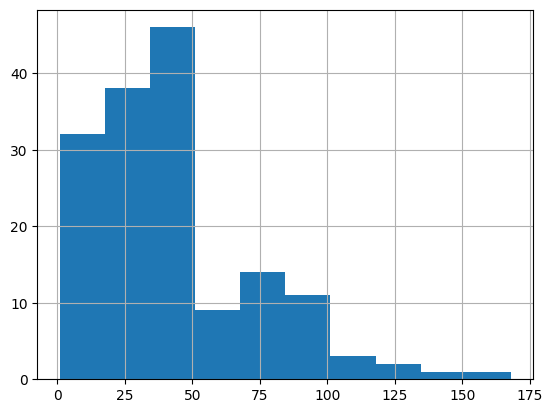

In [144]:
df['Ozone'].hist()

(array([32., 38., 46.,  9., 14., 11.,  3.,  2.,  1.,  1.]),
 array([  1. ,  17.7,  34.4,  51.1,  67.8,  84.5, 101.2, 117.9, 134.6,
        151.3, 168. ]),
 <BarContainer object of 10 artists>)

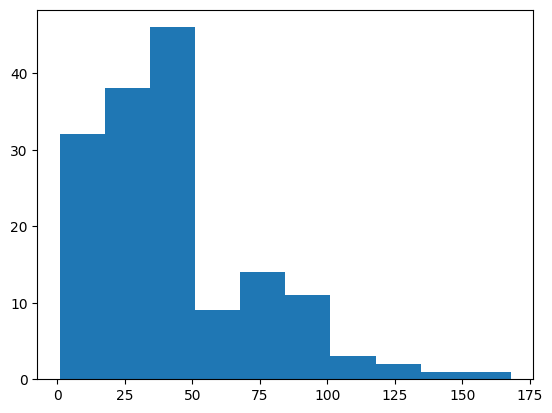

In [145]:
plt.hist(df['Ozone'])
# It will provide the x and y lebels for all bins in the hist daigra,

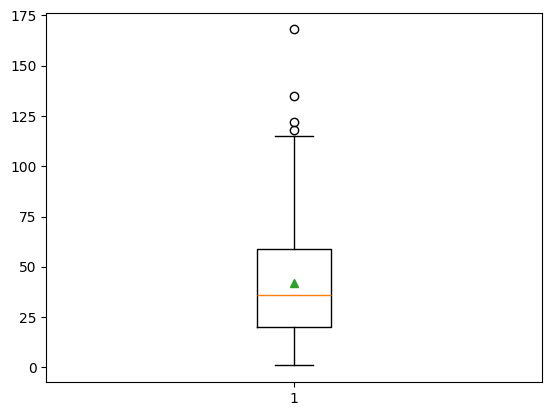

In [146]:
box=plt.boxplot(df['Ozone'],showmeans=True)

In [147]:
box.keys()

dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])

In [148]:
bx={}
for j in box.keys():
  bx[j]=[item.get_ydata() for item in box[j]]

bx

{'whiskers': [array([20.,  1.]), array([ 59., 115.])],
 'caps': [array([1., 1.]), array([115., 115.])],
 'boxes': [array([20., 20., 59., 59., 20.])],
 'medians': [array([36.01587302, 36.01587302])],
 'fliers': [array([135., 122., 168., 118.])],
 'means': [array([41.76025204])]}

In [149]:
df['Ozone'].describe()

,Ozone
count,157.000000
mean,41.760252
std,30.390307
min,1.000000
25%,20.000000
50%,36.015873
75%,59.000000
max,168.000000


In [150]:
print('Interquartile Range',59-20)
print('Upper Limit',59+1.5*(59-20))
print('Lower Limit',20-1.5*(59-20))

Interquartile Range 39
Upper Limit 117.5
Lower Limit -38.5


In [151]:
Outlier=df[df['Ozone']>117.5]
Outlier

,Ozone,Solar,Wind,Month,Day,Temp_F,Weather
61,135.0,269.0,4.1,7.0,1,84,S
98,122.0,255.0,4.0,8.0,7,89,C
116,168.0,238.0,3.4,8.0,25,81,PS
120,118.0,225.0,2.3,8.0,29,94,S


<Axes: >

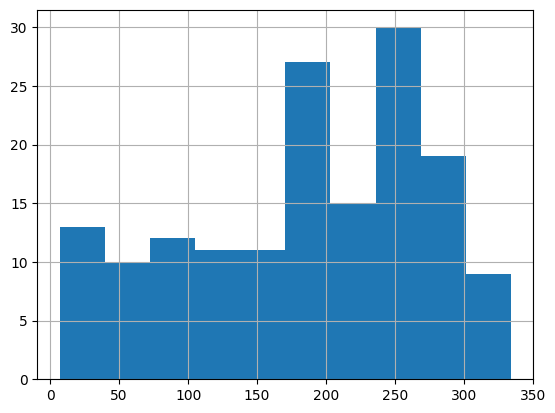

In [152]:
df['Solar'].hist()

In [153]:
df['Solar'].describe()


,Solar
count,157.000000
mean,185.974522
std,87.044783
min,7.000000
25%,127.000000
50%,199.000000
75%,255.000000
max,334.000000


In [154]:
print('IQR',255-127)
print('UQL',255+1.5*(255-127))
print('LQL',127-1.5*(255-127))

IQR 128
UQL 447.0
LQL -65.0


In [155]:
Solar_Outlier=df[df['Solar']>447]
Solar_Outlier

,Ozone,Solar,Wind,Month,Day,Temp_F,Weather


In [156]:
# There is no one outlier in Solar Column

In [157]:
df['Wind'].describe()

,Wind
count,157.000000
mean,9.929936
std,3.505188
min,1.700000
25%,7.400000
50%,9.700000
75%,11.500000
max,20.700000


In [158]:
wind_Outlier=df[df['Wind']>(11.5+1.5*(11.5-7.4))]


print('UQL',11.5+1.5*(11.5-7.4))

UQL 17.65


In [159]:
wind_Outlier

,Ozone,Solar,Wind,Month,Day,Temp_F,Weather
8,8.0,19.0,20.1,5.0,9,61,PS
17,6.0,78.0,18.4,5.0,18,57,C
47,37.0,284.0,20.7,6.0,17,72,C


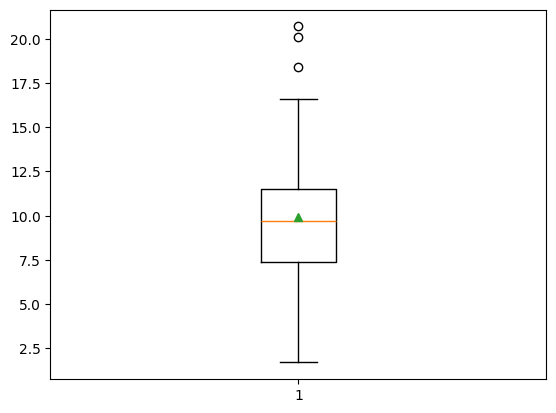

In [160]:
box=plt.boxplot(df['Wind'],showmeans=True);

In [161]:
box.keys()

dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])

In [162]:
bx={}
for j in box.keys():
  bx[j]=[item.get_ydata() for item in box[j]]
bx

{'whiskers': [array([7.4, 1.7]), array([11.5, 16.6])],
 'caps': [array([1.7, 1.7]), array([16.6, 16.6])],
 'boxes': [array([ 7.4,  7.4, 11.5, 11.5,  7.4])],
 'medians': [array([9.7, 9.7])],
 'fliers': [array([20.1, 18.4, 20.7])],
 'means': [array([9.92993631])]}

In [163]:
df['Month'].describe()

,Month
count,157.000000
mean,7.019108
std,1.434338
min,5.000000
25%,6.000000
50%,7.000000
75%,8.000000
max,9.000000


In [164]:
print('UQL',8+1.5*(8-6))

UQL 11.0


In [165]:
# No one out lier in Month
Month_outlier=df[df['Month']>11.0]
Month_outlier

,Ozone,Solar,Wind,Month,Day,Temp_F,Weather


In [166]:
df['Day'].describe()

,Day
count,157.000000
mean,15.929936
std,8.974404
min,1.000000
25%,8.000000
50%,16.000000
75%,24.000000
max,31.000000


In [167]:
print('UQL',24+1.5*(24-8))

UQL 48.0


In [168]:
# No one Outlier in Days

In [169]:
df['Temp_F'].describe()

,Temp_F
count,157.000000
mean,77.745223
std,9.405334
min,56.000000
25%,72.000000
50%,79.000000
75%,84.000000
max,97.000000


In [170]:
print('UQL',84+1.5*(84-72))

UQL 102.0


<Axes: xlabel='Weather'>

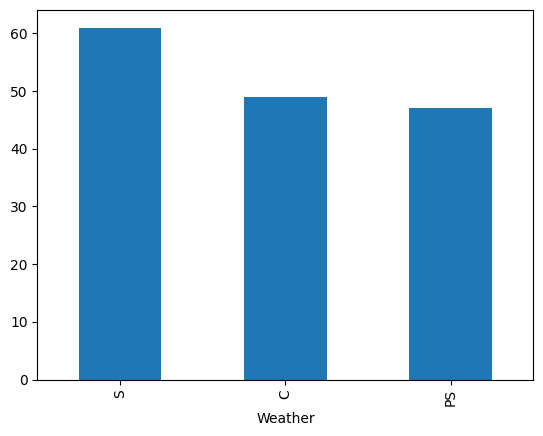

In [171]:
# No one outlier in Temp_F
# Now check outlier in categorical data
#If any category has only 1 frequency, we can consider that as an outlier.
df['Weather'].value_counts().plot.bar()

# Scatter plot and Correlation analysis

In [172]:
# Now to check relation between the column

# it can be read in daignal form, there are same data on both side of daignal
#Correlation


# -1 ----------- -0.5 ----------- 0 ----------- 0.5 ----------- 1

#Correlation is always between -1 to +1
#-1 to -0.5 & +0.5 to +1 is strong correlationship
#-0.5 to 0 & 0 to 0.5 is moderate correlationship
#Values very close to 0 indicate no correlationship

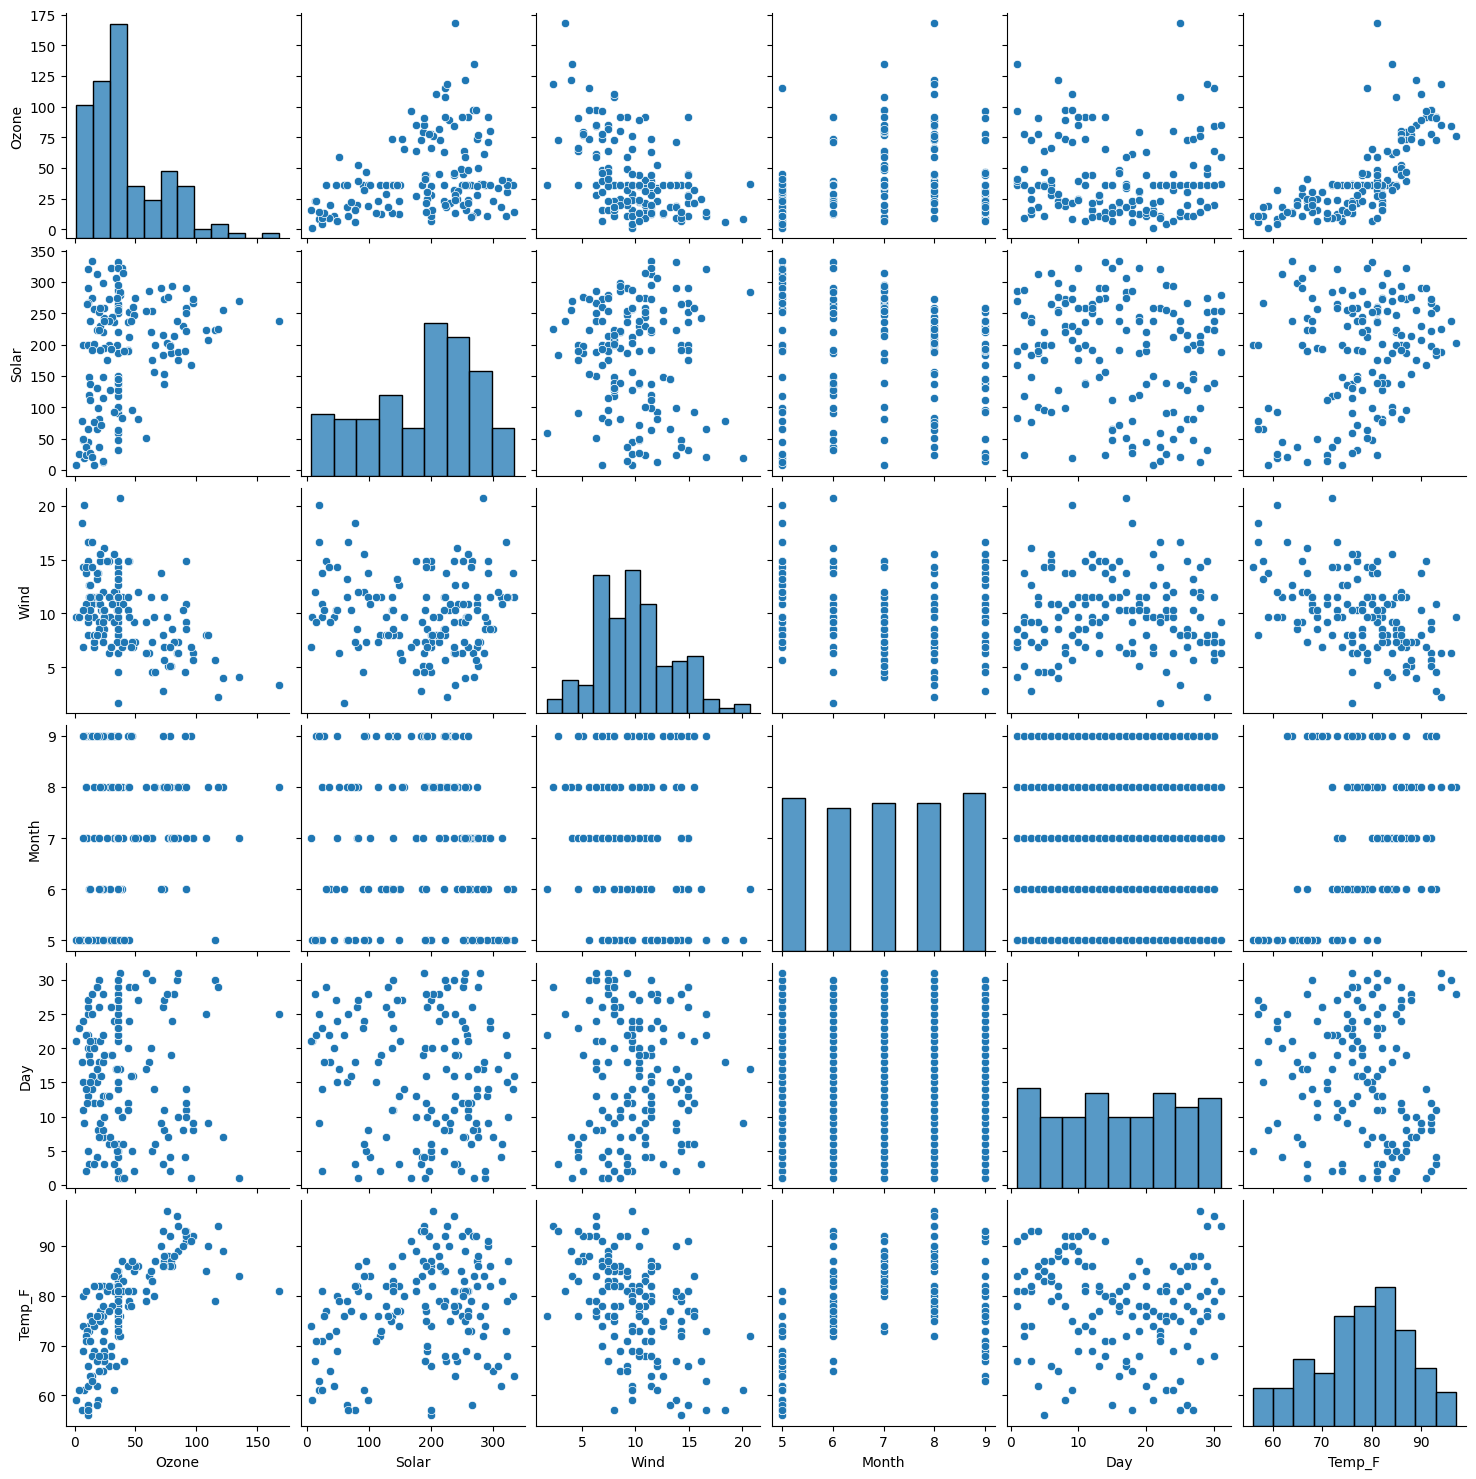

In [173]:
# We can say the most strong reletion b/w Ozone aand Temp_F

# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(df)


### Transformations
Creating dummy variable for Weather column

Dummy variable creation

One Hot Encoding

In [174]:
df

,Ozone,Solar,Wind,Month,Day,Temp_F,Weather
0,41.000000,190.0,7.4,5.0,1,67,S
1,36.000000,118.0,8.0,5.0,2,72,C
2,12.000000,149.0,12.6,5.0,3,74,PS
3,18.000000,313.0,11.5,5.0,4,62,S
4,11.000000,199.0,14.3,5.0,5,56,S
...,...,...,...,...,...,...,...
152,20.000000,223.0,11.5,9.0,30,68,S
153,41.000000,190.0,7.4,5.0,1,67,C
154,30.000000,193.0,6.9,9.0,26,70,PS
155,36.015873,145.0,13.2,9.0,27,77,S


In [176]:
df=pd.get_dummies(df,columns=['Weather'],dtype=int)
df

,Ozone,Solar,Wind,Month,Day,Temp_F,Weather_C,Weather_PS,Weather_S
0,41.000000,190.0,7.4,5.0,1,67,0,0,1
1,36.000000,118.0,8.0,5.0,2,72,1,0,0
2,12.000000,149.0,12.6,5.0,3,74,0,1,0
3,18.000000,313.0,11.5,5.0,4,62,0,0,1
4,11.000000,199.0,14.3,5.0,5,56,0,0,1
...,...,...,...,...,...,...,...,...,...
152,20.000000,223.0,11.5,9.0,30,68,0,0,1
153,41.000000,190.0,7.4,5.0,1,67,1,0,0
154,30.000000,193.0,6.9,9.0,26,70,0,1,0
155,36.015873,145.0,13.2,9.0,27,77,0,0,1


##Conclusion

The exploratory data analysis provided a comprehensive understanding of the weather dataset and its underlying patterns. Initial data inspection revealed minor missing values and inconsistencies, which were successfully handled during the data cleaning phase, resulting in a reliable and analysis-ready dataset.

Univariate analysis highlighted the distribution and variability of key weather parameters such as temperature, Ozon,Solar and wind speed. These variables exhibited clear seasonal behavior, particularly in temperature and Ozon patterns.

For Bivariate and multivariate analysis we use pairplot Visualization techniques it revealed meaningful relationships among weather variables. A strong correlation was observed between Ozon and Temp.

Overall, the EDA process transformed raw weather data into structured insights, confirming that the dataset is well-suited for further analytical tasks. The findings establish a solid foundation for applying predictive modeling techniques to estimate future weather conditions.